## Week 2 assignment

#### Objectives

The objectives of this assignment are:

1. to try out different model architectures
2. to experiment with different kinds of regularization

#### Dataset

California housing dataset from keras

#### Task

In the course material, a neural network is trained and tested to have the mean average error of approximately 0,3 (in units of 100000$), when computed with the test set containing 20% of the available labeled data. Your task is to try out some strategies for obtaining a better model, and try to achieve a lower MAE than the above.

Prepare a Jupyter notebook containing an account of the problem treatment. You do not have to present all the different experiments you have performed in detail: a short mention of the various trials is enough. However, the training and subsequent testing of the finally selected model must be presented in the notebook.

Note the following:

- You should use three separate datasets: training, validation, and test sets.
- Check out a few different model architectures (e.g. change the number of neurons in the hidden layers).
- Select the model with optimal architecture among the ones you tried. Ideally, the model should still show some signs of - - overfitting (to make sure it has enough predictive power).
- Try out some of the strategies for reducing overfitting, and pick the one leading to the most promising results.
- Train the final model once more with training and validation sets combined, and evaluate it with the test set.
- Use markdown cells to document your work.





#### Data preparation

This block I import california housing dataset from keras and split it in training and testing dataset. When fitting the model I am using validation_Split inside that fitting function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import california_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras import callbacks

(x_train, y_train), (x_test, y_test) = california_housing.load_data(version='small', test_split=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

2025-04-17 13:22:50.964216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744885371.047923     556 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744885371.070749     556 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744885371.253802     556 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744885371.253845     556 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744885371.253850     556 computation_placer.cc:177] computation placer alr

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
(480, 8) (480,)
(120, 8) (120,)


##### This block standardizes training dataset.

In [2]:
# mean and standard deviation computed from training set only
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
y_train /= 1e5
y_test /= 1e5

#### Modeling

This block contains early_stop function to stop learn of the model if it detects over fitting.

In [ ]:
# Callback for early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=0.001,
    restore_best_weights=True
)

# Defining model layers
model = Sequential([
    Input(shape=(8,)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dense(1)
])

#Model compiling
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
model.summary()

I0000 00:00:1744885375.825025     556 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6687 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:0a:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,505 (709.00 KB)

 Trainable params: 179,329 (700.50 KB)

 Non-trainable params: 2,176 (8.50 KB)

In [14]:
# Fitting the model
history = model.fit(x_train, y_train, epochs=3000, batch_size=4000, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 3.3113 - mae: 0.2485 - val_loss: 3.4343 - val_mae: 0.3220
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3.3173 - mae: 0.2460 - val_loss: 3.4315 - val_mae: 0.3228
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3.3116 - mae: 0.2476 - val_loss: 3.4283 - val_mae: 0.3227
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 3.3089 - mae: 0.2459 - val_loss: 3.4254 - val_mae: 0.3226
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 3.3000 - mae: 0.2379 - val_loss: 3.4226 - val_mae: 0.3222
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 3.2975 - mae: 0.2453 - val_loss: 3.4199 - val_mae: 0.3218
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3.3026 - mae: 0.2436 - val_loss: 3.4174 - val_mae: 0.3211
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3.3183 - mae: 0.2655 - val_loss: 3.4147 - val_mae: 0.3205
Epoch 9/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 3.28

#### Visualization

I plot results in two plots. First one is train loss and valuation loss. Second one is train MAE (Mean absolute error) and valuation MAE. I also print best results of valuation MAE and valuation loss below.

Best validation loss: 0.55
Best validation mae: 0.29


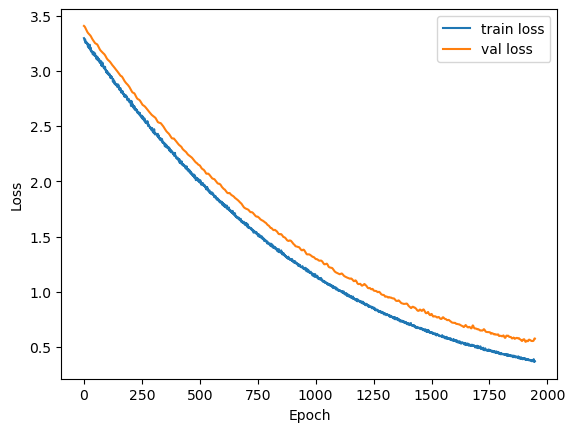

In [15]:
# Result plot of loss
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Validation result printings to 2 decimal
best_val_loss = min(history.history['val_loss'])
best_val_mae = min(history.history['val_mae'])
print(f'Best validation loss: {best_val_loss:.2f}')
print(f'Best validation mae: {best_val_mae:.2f}')

Text(0, 0.5, 'Mean absolute error (in 100000 $)')

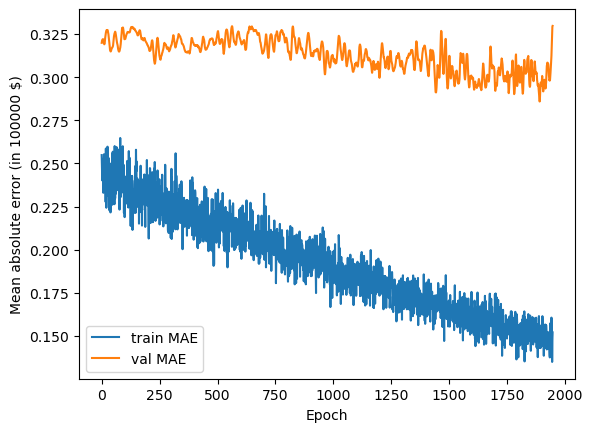

In [16]:
# Result plot of MAE
plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')

#### Summary

The training loss decreases steadily over epochs, indicating that the model is learning. However, the validation loss stabilizes after a certain point, suggesting the model may be approaching its optimal performance.

The model performed well on the training data, but there is a slight gap between training and validation loss, indicating potential over fitting.

After experimenting lot of different values to get validation MAE below 0.3 I found that kernel_regularization and chancing adam optimizer value to 0.0001 from default 0.001 gave me the best result and got me to ~0.28 validation mean absolute error.

And lastly I fit model with all data below.

In [17]:
# Fit with all data
history = model.fit(x_train, y_train, epochs=3000, batch_size=4000, verbose=1, callbacks=[early_stop])

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4255 - mae: 0.1850
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4226 - mae: 0.1792
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4280 - mae: 0.1881
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4172 - mae: 0.1794
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4161 - mae: 0.1829
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4244 - mae: 0.1915
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4106 - mae: 0.1756
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4046 - mae: 0.1710
Epoch 9/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4074 - mae: 0.1661
Epoch 10/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4078 - mae: 0.1750
Epoch 11/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4097 - mae: 0.1746
Epoch 12/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4050 - mae: 0.1750
Epoch 13/3000
1/1 ━━━━━━━━━━━━━━━━━━━

Best validation mae: 0.07


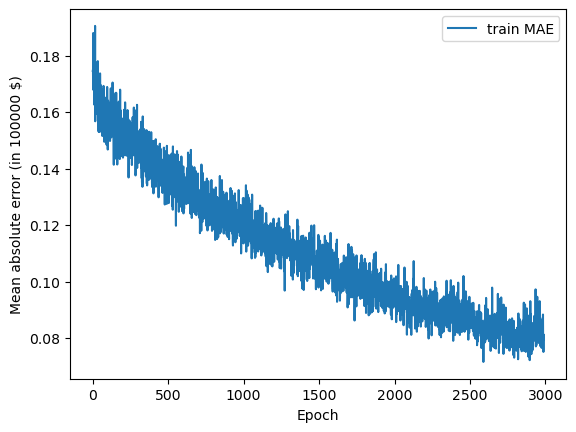

In [18]:
# Final plot of validation mae
plt.plot(history.history['mae'][10:], label='train MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')

best_mae = min(history.history['mae'])
print(f'Best validation mae: {best_mae:.2f}')

Best validation loss: 0.03


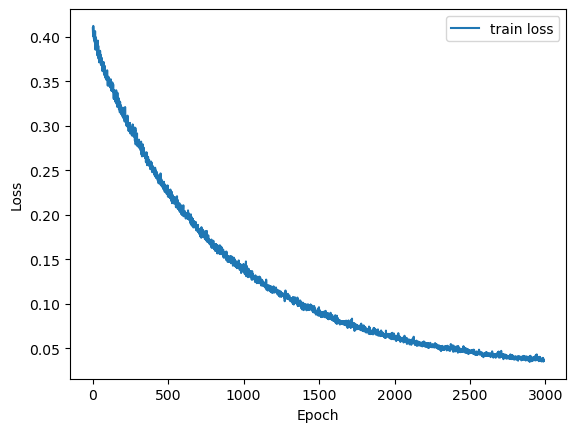

In [19]:
# Final plot of loss
plt.plot(history.history['loss'][10:], label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

best_loss = min(history.history['loss'])
print(f'Best validation loss: {best_loss:.2f}')